In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [8]:
df= pd.read_csv("E:\\MSBA\\New folder\\flipkart_reviews.csv")

In [91]:
df.head()

,Author,Rating,Review,Date,date_review
0,Ajin V,4.6,High quality camera😍,"Oct, 2023","Oct, 2023"
1,Mousam Guha Roy,5.0,Very nice,"Oct, 2023","Oct, 2023"
2,bijaya mohanty,4.0,Just go for it.Amazing one.Beautiful camera wi...,11 months ago,"Jun, 2024"
3,Prithivi Boruah,5.0,Camera Quality Is Improved Loving It,"Oct, 2023","Oct, 2023"
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,"Jan, 2024","Jan, 2024"


In [92]:
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (200, 5)


In [93]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary resources (only once is enough)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

# Define the clean_review function
def clean_review(text):
    if text is None:
        return ""
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))

    # Convert all characters to lowercase
    text = text.lower()

    # Tokenize each review
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize each word in each review
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Combine the cleaned tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Cleaning the text in the review column
df['cleaned_reviews'] = df['Review'].apply(clean_review)

# Display the first few rows of the DataFrame
df.head()

,Author,Rating,Review,Date,date_review,cleaned_reviews
0,Ajin V,4.6,High quality camera😍,"Oct, 2023","Oct, 2023",high quality camera
1,Mousam Guha Roy,5.0,Very nice,"Oct, 2023","Oct, 2023",nice
2,bijaya mohanty,4.0,Just go for it.Amazing one.Beautiful camera wi...,11 months ago,"Jun, 2024",go amazing one beautiful camera super fast pro...
3,Prithivi Boruah,5.0,Camera Quality Is Improved Loving It,"Oct, 2023","Oct, 2023",camera quality improved loving
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,"Jan, 2024","Jan, 2024",switch oneplus iphone stunned camera performan...


In [95]:
# Export the DataFrame to CSV
# df.to_csv('updatedoutput.csv', index=False)

# 2 - Data Preprocessing

## 2-1 - Cleaning the text

In [97]:
import re
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [98]:
import nltk

# Download the punkt resource
nltk.download('punkt')

# Your clean_review function
def clean_review(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))

    # Convert all characters to lowercase
    text = text.lower()

    # Tokenize each review
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize each word in each review
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Combine the cleaned tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Cleaning the text in the review column
df['cleaned reviews'] = df['Review'].apply(clean_review)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Author,Rating,Review,Date,date_review,cleaned_reviews,cleaned reviews
0,Ajin V,4.6,High quality camera😍,"Oct, 2023","Oct, 2023",high quality camera,high quality camera
1,Mousam Guha Roy,5.0,Very nice,"Oct, 2023","Oct, 2023",nice,nice
2,bijaya mohanty,4.0,Just go for it.Amazing one.Beautiful camera wi...,11 months ago,"Jun, 2024",go amazing one beautiful camera super fast pro...,go amazing one beautiful camera super fast pro...
3,Prithivi Boruah,5.0,Camera Quality Is Improved Loving It,"Oct, 2023","Oct, 2023",camera quality improved loving,camera quality improved loving
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,"Jan, 2024","Jan, 2024",switch oneplus iphone stunned camera performan...,switch oneplus iphone stunned camera performan...


2.2 Generating Sentiment Score for cleaned reviews


In [100]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Note: you may need to restart the kernel to use updated packages.


In [101]:
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment and analysis
def vader_sentiment_analysis(Review):
    vs = analyzer.polarity_scores(Review)
    compound = vs['compound']
    sentiment = 'Positive' if compound >= 0.5 else 'Negative' if compound < 0 else 'Neutral'
    return compound, sentiment

df[['Compound Score', 'Sentiment']] = df['cleaned reviews'].apply(vader_sentiment_analysis).tolist()

In [102]:
df.head()

,Author,Rating,Review,Date,date_review,cleaned_reviews,cleaned reviews,Compound Score,Sentiment
0,Ajin V,4.6,High quality camera😍,"Oct, 2023","Oct, 2023",high quality camera,high quality camera,0.0,Neutral
1,Mousam Guha Roy,5.0,Very nice,"Oct, 2023","Oct, 2023",nice,nice,0.4215,Neutral
2,bijaya mohanty,4.0,Just go for it.Amazing one.Beautiful camera wi...,11 months ago,"Jun, 2024",go amazing one beautiful camera super fast pro...,go amazing one beautiful camera super fast pro...,0.9118,Positive
3,Prithivi Boruah,5.0,Camera Quality Is Improved Loving It,"Oct, 2023","Oct, 2023",camera quality improved loving,camera quality improved loving,0.7906,Positive
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,"Jan, 2024","Jan, 2024",switch oneplus iphone stunned camera performan...,switch oneplus iphone stunned camera performan...,0.5106,Positive


3. Sentiment Analysis Report

In [104]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [106]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    140
Neutral      53
Negative      7
Name: count, dtype: int64


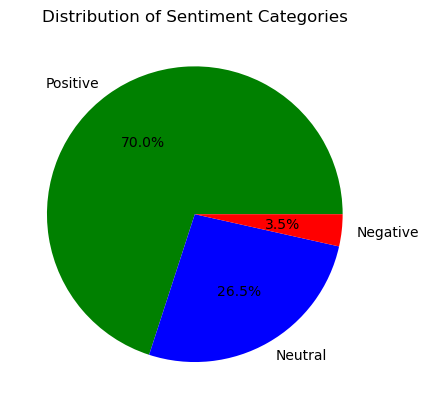

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for each sentiment category
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'blue'}

# Create a pie chart with custom colors
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=[colors[sentiment] for sentiment in sentiment_counts.index])
plt.title('Distribution of Sentiment Categories')

plt.show()

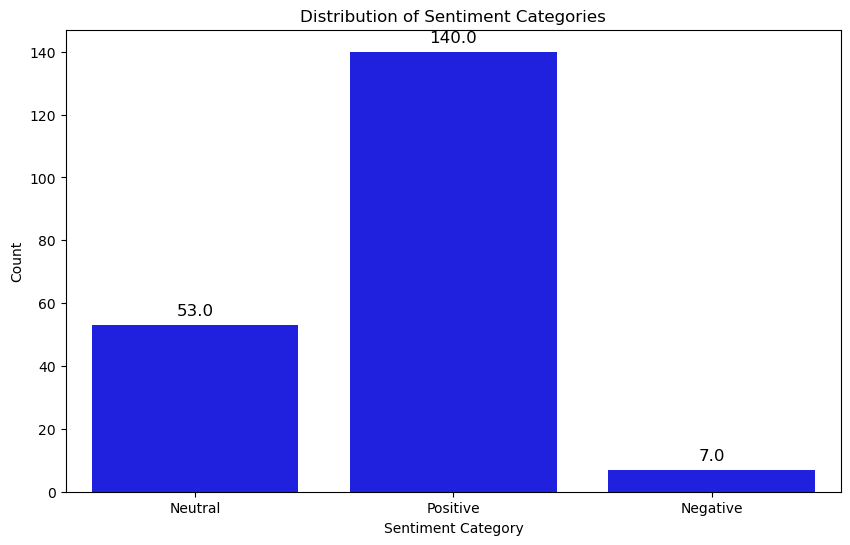

In [108]:
# Define colors for each sentiment category
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'blue'}

# Set the color palette for the countplot
sns.set_palette([colors[sentiment] for sentiment in df['Sentiment'].unique()])

# Create a countplot with custom colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sentiment', data=df)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15172\935630611.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_review'] = pd.to_datetime(df['date_review'])


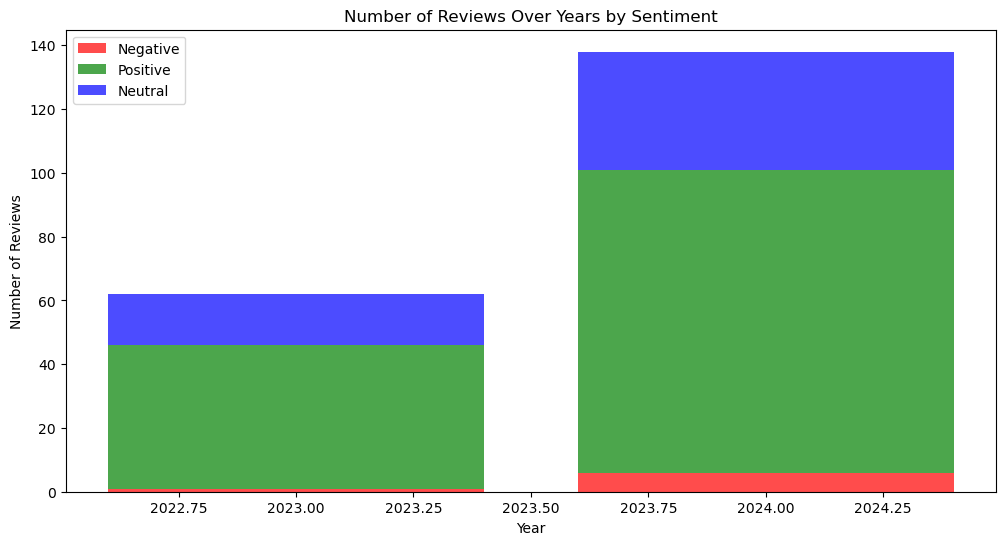

In [109]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the 'date_review' column to datetime format
df['date_review'] = pd.to_datetime(df['date_review'])

# Extract the year from the 'date_review' column
df['year'] = df['date_review'].dt.year

# Group the data by year and calculate the number of reviews and sentiment counts for each year
df_year_agg = df.groupby(['year', 'Sentiment']).size().unstack(fill_value=0).reset_index()

# Create a bar plot for the number of reviews with different colors for sentiment
plt.figure(figsize=(12, 6))
bottom = [0] * len(df_year_agg['year'])
sentiment_colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'blue'}

for sentiment in ['Negative', 'Positive', 'Neutral']:
    plt.bar(df_year_agg['year'], df_year_agg[sentiment], color=sentiment_colors[sentiment], alpha=0.7, label=sentiment, bottom=bottom)
    bottom = [sum(x) for x in zip(bottom, df_year_agg[sentiment])]

plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Years by Sentiment')
plt.legend()
plt.show()

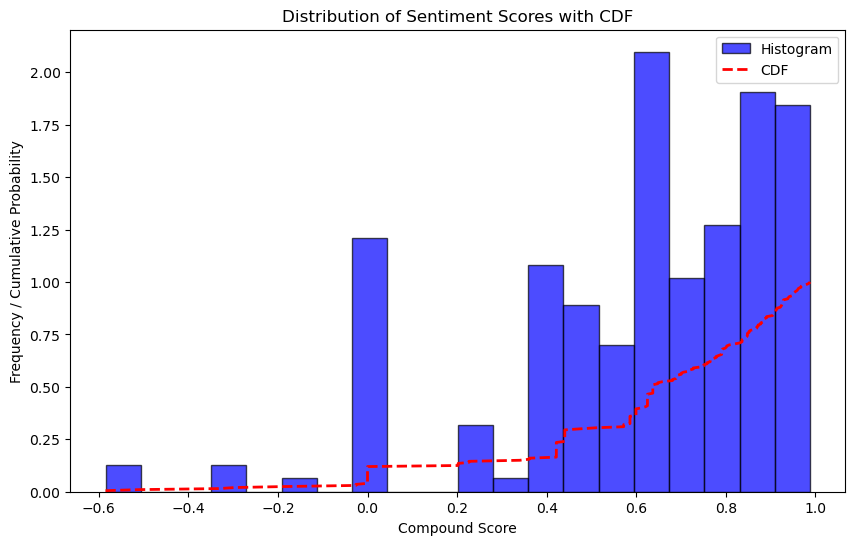

In [111]:
# Create a histogram of the Compound Score
plt.figure(figsize=(10, 6))
plt.hist(df['Compound Score'], bins=20, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Add a line graph for the cumulative distribution function (CDF)
sorted_scores = np.sort(df['Compound Score'])
cumulative = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)
plt.plot(sorted_scores, cumulative, color='red', linestyle='dashed', linewidth=2, label='CDF')

plt.title('Distribution of Sentiment Scores with CDF')
plt.xlabel('Compound Score')
plt.ylabel('Frequency / Cumulative Probability')
plt.legend()
plt.show()

In [125]:
df['Length'] = df['cleaned reviews'].apply(len)

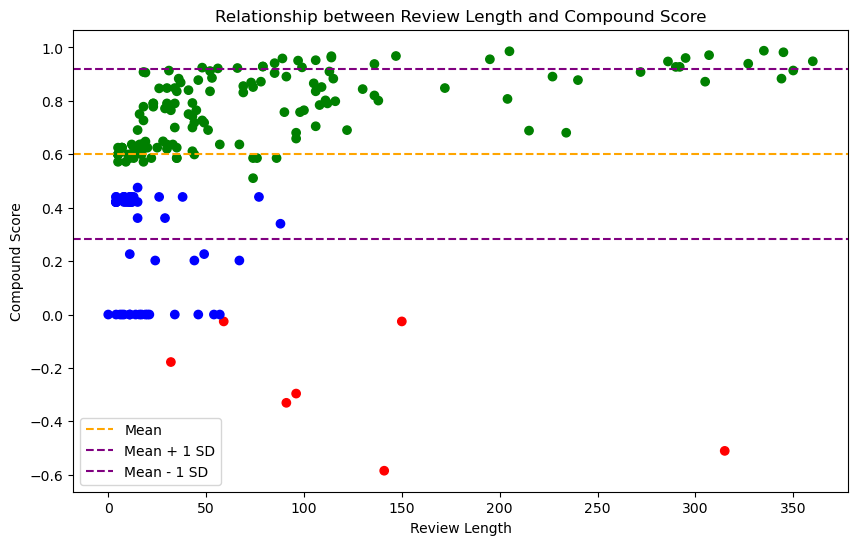

In [127]:
# Assign different colors to Compound Score values
colors = ['red' if score < 0 else 'green' if score >= 0.5 else 'blue' for score in df['Compound Score']]

# Calculate mean and standard deviation of Compound Score
mean_score = df['Compound Score'].mean()
std_dev_score = df['Compound Score'].std()

# Create a scatter plot with different colors for different Compound Score ranges
plt.figure(figsize=(10, 6))
plt.scatter(df['Length'], df['Compound Score'], c=colors)

# Add lines for mean and standard deviation
plt.axhline(y=mean_score, color='orange', linestyle='--', label='Mean')
plt.axhline(y=mean_score + std_dev_score, color='purple', linestyle='--', label='Mean + 1 SD')
plt.axhline(y=mean_score - std_dev_score, color='purple', linestyle='--', label='Mean - 1 SD')

plt.title('Relationship between Review Length and Compound Score')
plt.xlabel('Review Length')
plt.ylabel('Compound Score')
plt.legend()
plt.show()

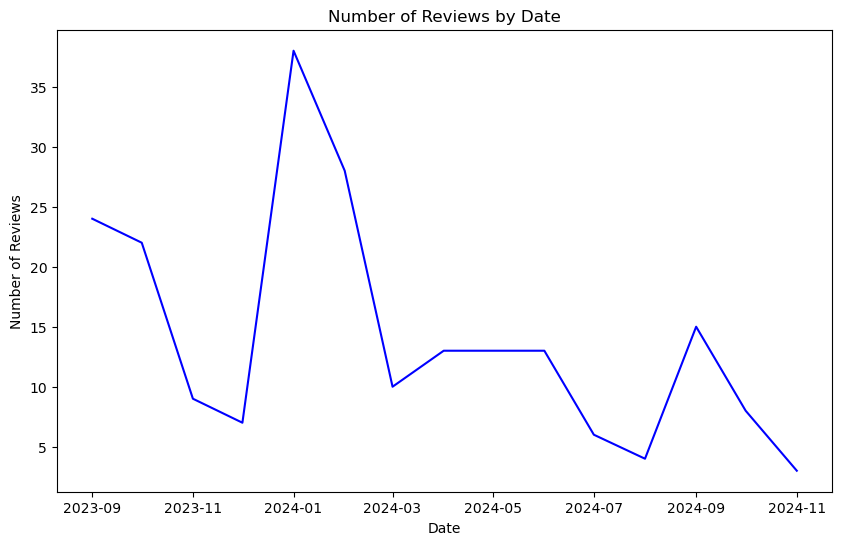

In [117]:
review_counts = df.groupby('date_review').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.plot(review_counts['date_review'], review_counts['count'])
plt.title('Number of Reviews by Date')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15172\2598961825.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df_date.resample('M').mean()


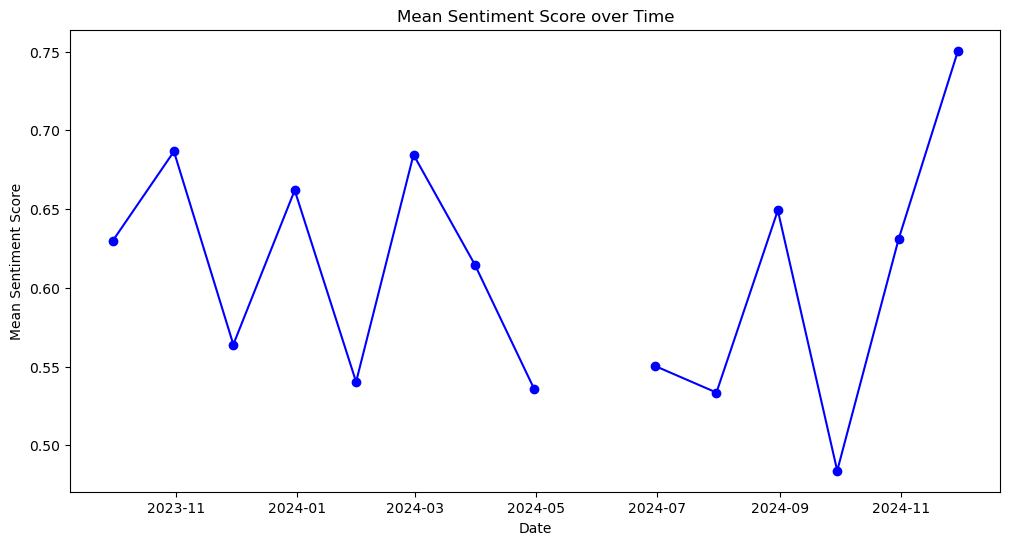

In [119]:
# Group the data by date and calculate the mean sentiment score for each date
df_date = df.groupby('date_review')['Compound Score'].mean().reset_index()

# Set the date column as the index
df_date.set_index('date_review', inplace=True)

# Resample the data by month and calculate the mean sentiment score for each month
df_month = df_date.resample('M').mean()

# Create a line plot of sentiment scores over time
plt.figure(figsize=(12,6))
plt.plot(df_month.index, df_month['Compound Score'], marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score over Time')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15172\1190291641.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month_agg = df_date_agg.resample('M').agg({'mean': 'mean', 'max': 'max', 'min': 'min'})


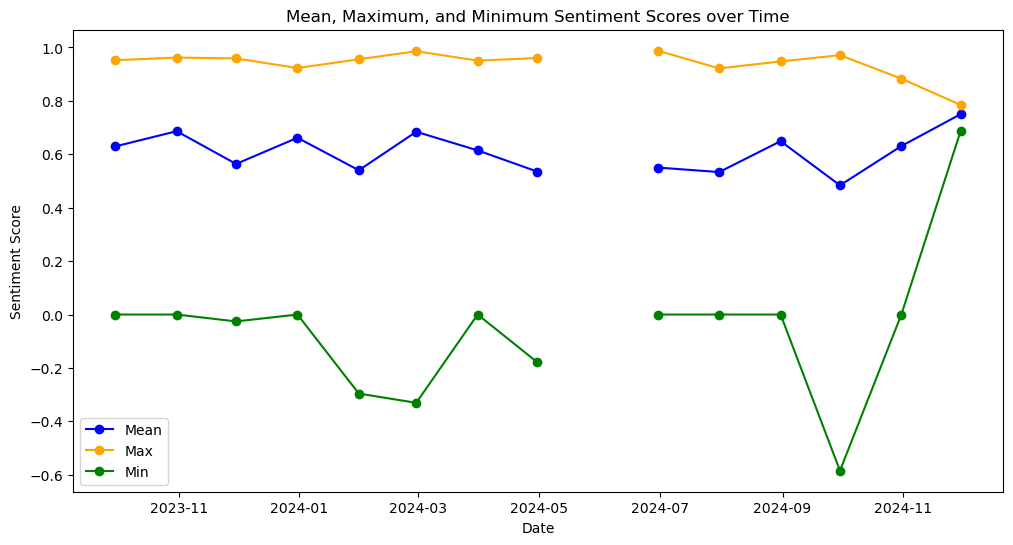

In [121]:
# Group the data by date and calculate the mean, maximum, and minimum sentiment score for each date
df_date_agg = df.groupby('date_review')['Compound Score'].agg(['mean', 'max', 'min']).reset_index()

# Set the date column as the index
df_date_agg.set_index('date_review', inplace=True)

# Resample the data by month and calculate the mean, maximum, and minimum sentiment score for each month
df_month_agg = df_date_agg.resample('M').agg({'mean': 'mean', 'max': 'max', 'min': 'min'})

# Create a line plot of mean, maximum, and minimum sentiment scores over time
plt.figure(figsize=(12, 6))
plt.plot(df_month_agg.index, df_month_agg['mean'], marker='o', label='Mean', color='blue')
plt.plot(df_month_agg.index, df_month_agg['max'], marker='o', label='Max', color='orange')
plt.plot(df_month_agg.index, df_month_agg['min'], marker='o', label='Min', color='green')

plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Mean, Maximum, and Minimum Sentiment Scores over Time')
plt.legend()
plt.show()

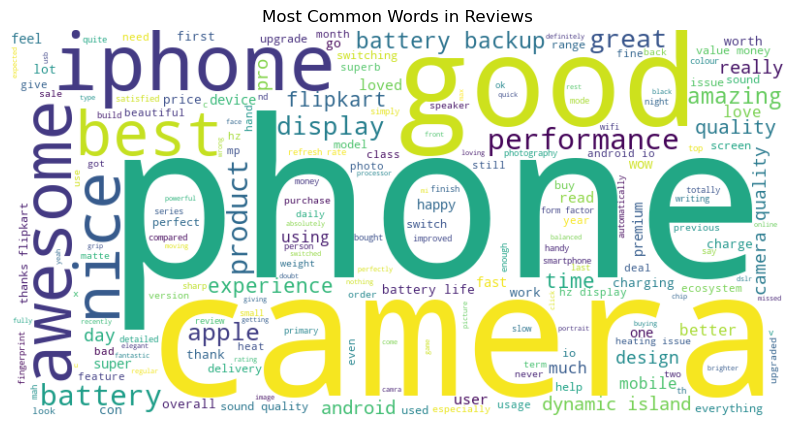

In [123]:
words = ' '.join(df['cleaned reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

Live Streaming of Reviews 

In [4]:
import pandas as pd
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

 

# Load the reviews scraped by your existing code
#df = pd.read_csv("flipkart_reviews.csv")

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ Starting real-time sentiment stream...\n")

for index, row in df.iterrows():
    review = row['Review']
    sentiment = analyzer.polarity_scores(review)
    
    print(f"📝 Review {index + 1}: {review}")
    print(f"🔍 Sentiment Scores: {sentiment}")
    print("-" * 60)
    
    # Simulate live streaming by pausing
    time.sleep(1)  # 1-second delay per review (adjust as needed)

print("✅ Real-time sentiment stream completed.")

Web Application

import streamlit as st
import pandas as pd
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Load your scraped reviews
df = pd.read_csv("flipkart_reviews.csv")

# App title
st.title("📺 Real-Time Sentiment Streaming + Dashboard")

# Sidebar controls
st.sidebar.header("Controls")
stream_reviews = st.sidebar.checkbox("Stream Reviews One by One", value=True)
show_dashboard = st.sidebar.checkbox("Show Dashboard", value=True)

# Real-Time Streaming Section
if stream_reviews:
    st.subheader("📝 Live Review Stream")
    sentiment_records = []

    progress_bar = st.progress(0)
    status_text = st.empty()

    for index, row in df.iterrows():
        review = row['Review']
        sentiment = analyzer.polarity_scores(review)
        sentiment_records.append(sentiment['compound'])

        st.write(f"*Review {index + 1}:* {review}")
        st.write(f"Sentiment: {sentiment}")

        progress_bar.progress((index + 1) / len(df))
        status_text.text(f"Streaming review {index + 1} of {len(df)}...")

        time.sleep(0.5)  # Adjust delay as needed

    st.success("✅ Streaming Completed!")

# Dashboard Section
if show_dashboard:
    st.subheader("📊 Sentiment Dashboard")

    df['compound'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
    df['Sentiment Label'] = df['compound'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

    # Sentiment counts
    sentiment_counts = df['Sentiment Label'].value_counts()

    # Bar chart
    st.write("### Sentiment Distribution")
    st.bar_chart(sentiment_counts)

    # Pie chart
    fig, ax = plt.subplots()
    ax.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    st.pyplot(fig)

    # Show data table
    if st.checkbox("Show Raw Data"):
        st.write(df[['Review', 'compound', 'Sentiment Label']])